In [5]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [6]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [7]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

7.3%

100.0%


Extracting input/data/MNIST/raw/train-images-idx3-ubyte.gz to input/data/MNIST/raw



100.0%

Extracting input/data/MNIST/raw/train-labels-idx1-ubyte.gz to input/data/MNIST/raw




37.8%

100.0%


Extracting input/data/MNIST/raw/t10k-images-idx3-ubyte.gz to input/data/MNIST/raw



100.0%

Extracting input/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to input/data/MNIST/raw



# Generator

In [8]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [10]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [11]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [12]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [13]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [15]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [16]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [17]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [18]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:07, 14.84it/s]                         


Epoch 1 of 100
Generator loss: 1.52200760, Discriminator loss: 0.82276994


118it [00:07, 15.23it/s]                         


Epoch 2 of 100
Generator loss: 3.40653800, Discriminator loss: 1.19392076


118it [00:07, 15.25it/s]                         


Epoch 3 of 100
Generator loss: 5.32758005, Discriminator loss: 0.27149061


118it [00:07, 15.45it/s]                         


Epoch 4 of 100
Generator loss: 3.36900896, Discriminator loss: 1.20730740


118it [00:07, 15.05it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


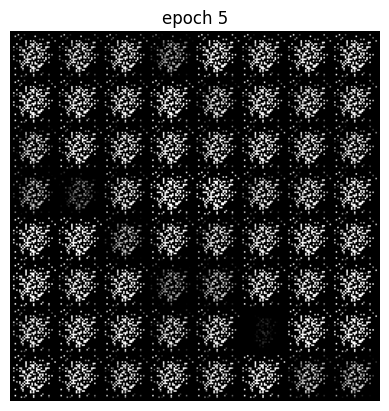

Epoch 5 of 100
Generator loss: 1.63407712, Discriminator loss: 1.22191092


118it [00:07, 15.03it/s]                         


Epoch 6 of 100
Generator loss: 4.58072412, Discriminator loss: 0.61551605


118it [00:08, 13.17it/s]                         


Epoch 7 of 100
Generator loss: 2.05049091, Discriminator loss: 0.92836346


118it [00:09, 12.64it/s]                         


Epoch 8 of 100
Generator loss: 2.08698474, Discriminator loss: 1.18480148


118it [00:08, 14.32it/s]                         


Epoch 9 of 100
Generator loss: 1.52626607, Discriminator loss: 1.03569320


118it [00:08, 14.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


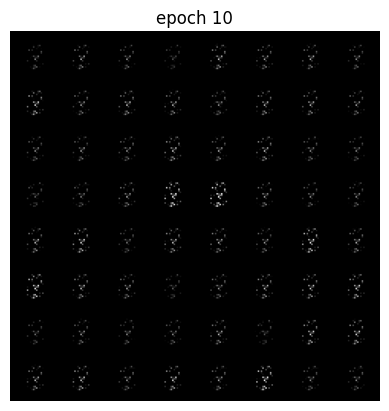

Epoch 10 of 100
Generator loss: 2.99768917, Discriminator loss: 0.90097823


118it [00:08, 13.85it/s]                         


Epoch 11 of 100
Generator loss: 1.64288316, Discriminator loss: 0.90343040


118it [00:07, 14.81it/s]                         


Epoch 12 of 100
Generator loss: 2.15098100, Discriminator loss: 0.97359163


118it [00:08, 14.54it/s]                         


Epoch 13 of 100
Generator loss: 1.76665604, Discriminator loss: 1.04942938


118it [00:08, 14.30it/s]                         


Epoch 14 of 100
Generator loss: 2.80051630, Discriminator loss: 1.13832710


118it [00:08, 13.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


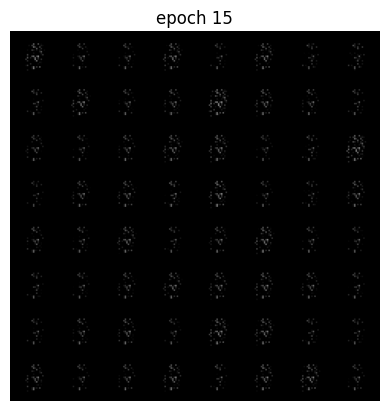

Epoch 15 of 100
Generator loss: 1.89591966, Discriminator loss: 0.83855497


118it [00:09, 12.84it/s]                         


Epoch 16 of 100
Generator loss: 3.16730826, Discriminator loss: 0.65538807


118it [00:08, 13.94it/s]                         


Epoch 17 of 100
Generator loss: 2.57791674, Discriminator loss: 0.80850614


118it [00:08, 14.56it/s]                         


Epoch 18 of 100
Generator loss: 2.54672332, Discriminator loss: 0.69554030


118it [00:08, 14.23it/s]                         


Epoch 19 of 100
Generator loss: 1.85176546, Discriminator loss: 0.70032879


118it [00:08, 14.20it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


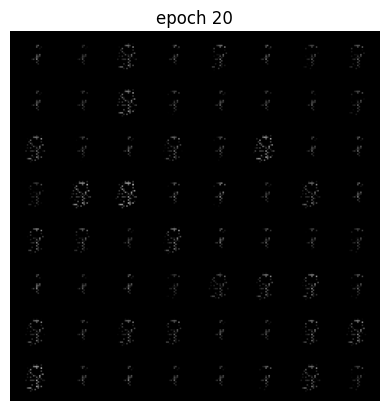

Epoch 20 of 100
Generator loss: 2.67846442, Discriminator loss: 0.58258092


118it [00:08, 14.17it/s]                         


Epoch 21 of 100
Generator loss: 2.82312032, Discriminator loss: 0.61714567


118it [00:08, 13.76it/s]                         


Epoch 22 of 100
Generator loss: 2.36229167, Discriminator loss: 0.54217990


118it [00:08, 13.62it/s]                         


Epoch 23 of 100
Generator loss: 2.91618193, Discriminator loss: 0.33218329


118it [00:08, 14.23it/s]                         


Epoch 24 of 100
Generator loss: 3.51112603, Discriminator loss: 0.26104701


118it [00:09, 12.87it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


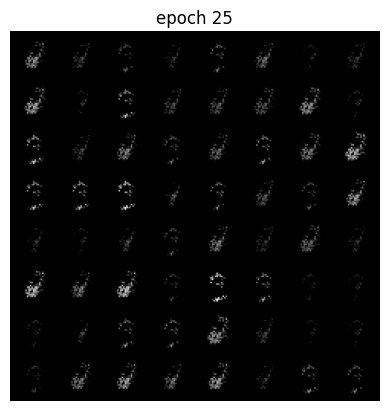

Epoch 25 of 100
Generator loss: 4.03308168, Discriminator loss: 0.32155189


118it [00:08, 14.09it/s]                         


Epoch 26 of 100
Generator loss: 3.54130832, Discriminator loss: 0.43025724


118it [00:08, 13.78it/s]                         


Epoch 27 of 100
Generator loss: 3.38556770, Discriminator loss: 0.43603235


118it [00:08, 14.12it/s]                         


Epoch 28 of 100
Generator loss: 2.92205369, Discriminator loss: 0.50458449


118it [00:10, 10.96it/s]                         


Epoch 29 of 100
Generator loss: 3.05019262, Discriminator loss: 0.48353924


118it [00:13,  8.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


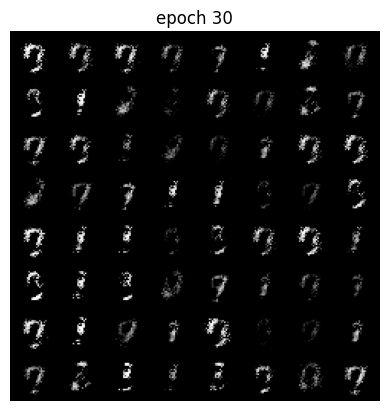

Epoch 30 of 100
Generator loss: 3.13619322, Discriminator loss: 0.46604807


118it [00:12,  9.60it/s]                         


Epoch 31 of 100
Generator loss: 3.12673876, Discriminator loss: 0.43325962


118it [00:10, 11.31it/s]                         


Epoch 32 of 100
Generator loss: 2.78578789, Discriminator loss: 0.59655284


118it [00:09, 12.80it/s]                         


Epoch 33 of 100
Generator loss: 2.72242781, Discriminator loss: 0.55969466


118it [00:09, 13.02it/s]                         


Epoch 34 of 100
Generator loss: 2.95102923, Discriminator loss: 0.48763653


118it [00:09, 12.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


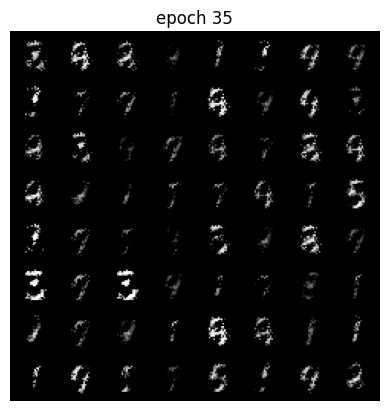

Epoch 35 of 100
Generator loss: 2.43036811, Discriminator loss: 0.63738528


118it [00:09, 12.65it/s]                         


Epoch 36 of 100
Generator loss: 2.54588795, Discriminator loss: 0.58426545


118it [00:08, 13.16it/s]                         


Epoch 37 of 100
Generator loss: 2.95701174, Discriminator loss: 0.48374564


118it [00:08, 14.66it/s]                         


Epoch 38 of 100
Generator loss: 2.96087456, Discriminator loss: 0.63194342


118it [00:08, 13.47it/s]                         


Epoch 39 of 100
Generator loss: 2.74875720, Discriminator loss: 0.55613498


118it [00:09, 12.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


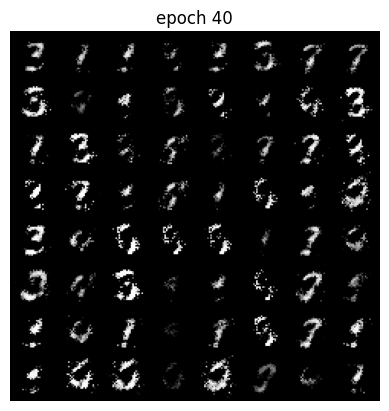

Epoch 40 of 100
Generator loss: 3.01227351, Discriminator loss: 0.49561858


118it [00:08, 14.19it/s]                         


Epoch 41 of 100
Generator loss: 2.82486800, Discriminator loss: 0.61942197


118it [00:08, 13.29it/s]                         


Epoch 42 of 100
Generator loss: 3.04627191, Discriminator loss: 0.52254579


118it [00:07, 15.08it/s]                         


Epoch 43 of 100
Generator loss: 2.62536297, Discriminator loss: 0.56301214


118it [00:07, 15.21it/s]                         


Epoch 44 of 100
Generator loss: 2.92552594, Discriminator loss: 0.47064831


118it [00:07, 15.17it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


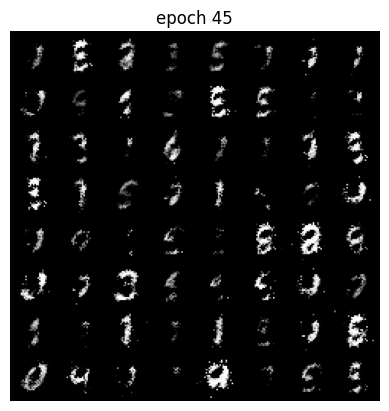

Epoch 45 of 100
Generator loss: 2.93899606, Discriminator loss: 0.53347580


118it [00:08, 13.95it/s]                         


Epoch 46 of 100
Generator loss: 2.62103752, Discriminator loss: 0.63444137


118it [00:08, 13.64it/s]                         


Epoch 47 of 100
Generator loss: 2.73696033, Discriminator loss: 0.61603693


118it [00:08, 13.24it/s]                         


Epoch 48 of 100
Generator loss: 2.41320196, Discriminator loss: 0.66621608


118it [00:09, 12.28it/s]                         


Epoch 49 of 100
Generator loss: 2.48241949, Discriminator loss: 0.65042438


118it [00:11, 10.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


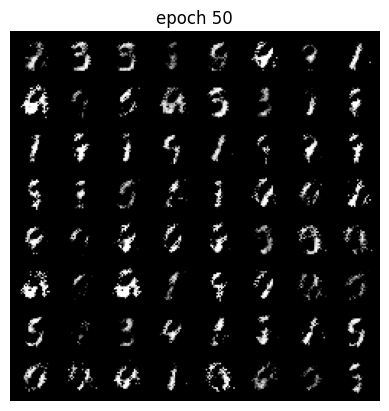

Epoch 50 of 100
Generator loss: 2.52095585, Discriminator loss: 0.62640951


118it [00:10, 11.37it/s]                         


Epoch 51 of 100
Generator loss: 2.66956261, Discriminator loss: 0.61460259


118it [00:09, 11.90it/s]                         


Epoch 52 of 100
Generator loss: 2.46519121, Discriminator loss: 0.64357552


118it [00:08, 14.28it/s]                         


Epoch 53 of 100
Generator loss: 2.42535874, Discriminator loss: 0.65073707


118it [00:07, 14.81it/s]                         


Epoch 54 of 100
Generator loss: 2.64948042, Discriminator loss: 0.59527034


118it [00:08, 14.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


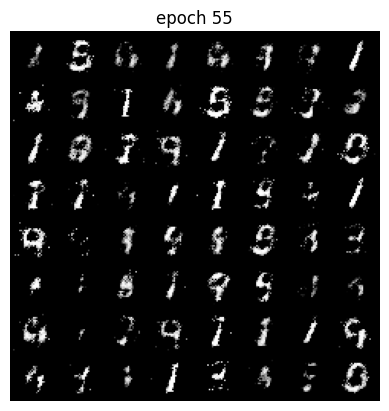

Epoch 55 of 100
Generator loss: 2.41503539, Discriminator loss: 0.60135728


118it [00:08, 13.91it/s]                         


Epoch 56 of 100
Generator loss: 2.24904359, Discriminator loss: 0.68398638


118it [00:08, 14.47it/s]                         


Epoch 57 of 100
Generator loss: 2.43261242, Discriminator loss: 0.65448354


118it [00:08, 14.50it/s]                         


Epoch 58 of 100
Generator loss: 2.52713537, Discriminator loss: 0.68384111


118it [00:08, 14.09it/s]                         


Epoch 59 of 100
Generator loss: 2.45138516, Discriminator loss: 0.66992078


118it [00:08, 13.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


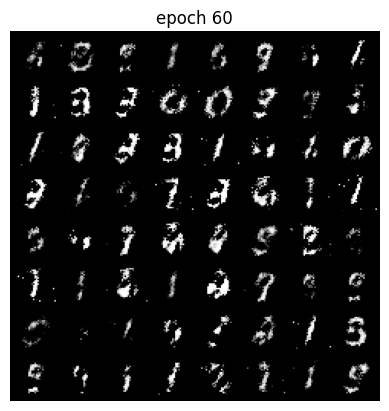

Epoch 60 of 100
Generator loss: 2.15320419, Discriminator loss: 0.72401103


118it [00:08, 14.18it/s]                         


Epoch 61 of 100
Generator loss: 2.26800253, Discriminator loss: 0.68642310


118it [00:08, 14.65it/s]                         


Epoch 62 of 100
Generator loss: 2.21353824, Discriminator loss: 0.69256353


118it [00:09, 12.23it/s]                         


Epoch 63 of 100
Generator loss: 2.44361881, Discriminator loss: 0.62941815


118it [00:10, 10.73it/s]                         


Epoch 64 of 100
Generator loss: 2.61586275, Discriminator loss: 0.63253410


118it [00:07, 15.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


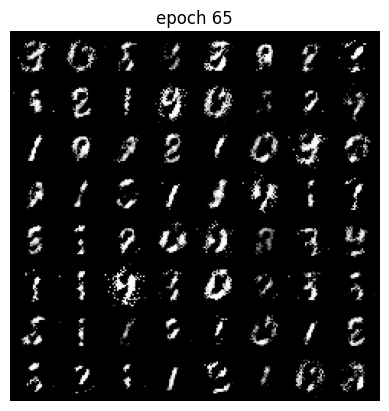

Epoch 65 of 100
Generator loss: 2.45678612, Discriminator loss: 0.67290584


118it [00:07, 14.90it/s]                         


Epoch 66 of 100
Generator loss: 2.30861573, Discriminator loss: 0.66643078


118it [00:07, 15.20it/s]                         


Epoch 67 of 100
Generator loss: 2.38523046, Discriminator loss: 0.69299428


118it [00:07, 14.84it/s]                         


Epoch 68 of 100
Generator loss: 2.21614270, Discriminator loss: 0.75144775


118it [00:07, 15.32it/s]                         


Epoch 69 of 100
Generator loss: 2.22436612, Discriminator loss: 0.75587066


118it [00:08, 14.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


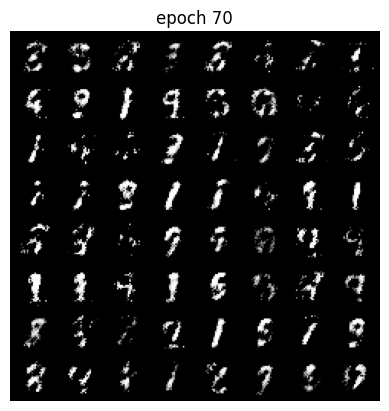

Epoch 70 of 100
Generator loss: 2.15159379, Discriminator loss: 0.76441732


118it [00:08, 14.09it/s]                         


Epoch 71 of 100
Generator loss: 1.99384777, Discriminator loss: 0.72877458


118it [00:08, 14.67it/s]                         


Epoch 72 of 100
Generator loss: 2.18059318, Discriminator loss: 0.68914337


118it [00:07, 14.92it/s]                         


Epoch 73 of 100
Generator loss: 2.19598948, Discriminator loss: 0.74792685


118it [00:07, 15.36it/s]                         


Epoch 74 of 100
Generator loss: 2.16871492, Discriminator loss: 0.79018792


118it [00:07, 15.54it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


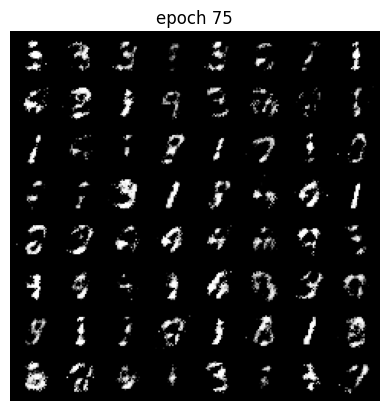

Epoch 75 of 100
Generator loss: 1.96922147, Discriminator loss: 0.77972073


118it [00:07, 15.36it/s]                         


Epoch 76 of 100
Generator loss: 2.19698562, Discriminator loss: 0.70946923


118it [00:07, 15.19it/s]                         


Epoch 77 of 100
Generator loss: 2.01812174, Discriminator loss: 0.76086489


118it [00:07, 15.27it/s]                         


Epoch 78 of 100
Generator loss: 2.04711072, Discriminator loss: 0.76953690


118it [00:08, 14.44it/s]                         


Epoch 79 of 100
Generator loss: 1.93178946, Discriminator loss: 0.83678530


118it [00:07, 15.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


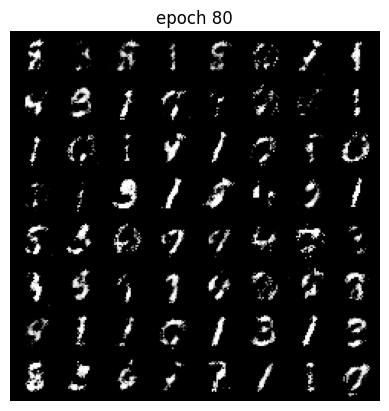

Epoch 80 of 100
Generator loss: 2.03370047, Discriminator loss: 0.77714424


118it [00:07, 14.96it/s]                         


Epoch 81 of 100
Generator loss: 2.14837267, Discriminator loss: 0.73265839


118it [00:07, 15.40it/s]                         


Epoch 82 of 100
Generator loss: 2.05528548, Discriminator loss: 0.71457607


118it [00:07, 15.39it/s]                         


Epoch 83 of 100
Generator loss: 2.19261438, Discriminator loss: 0.68881620


118it [00:07, 15.22it/s]                         


Epoch 84 of 100
Generator loss: 1.96288302, Discriminator loss: 0.78592703


118it [00:07, 14.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


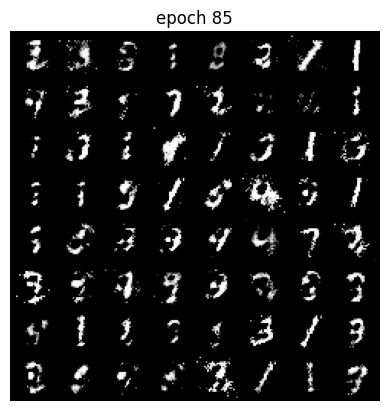

Epoch 85 of 100
Generator loss: 1.86310713, Discriminator loss: 0.79933398


118it [00:08, 14.12it/s]                         


Epoch 86 of 100
Generator loss: 1.91652110, Discriminator loss: 0.84667942


118it [00:07, 15.18it/s]                         


Epoch 87 of 100
Generator loss: 1.85854866, Discriminator loss: 0.81572946


118it [00:07, 15.52it/s]                         


Epoch 88 of 100
Generator loss: 1.99608147, Discriminator loss: 0.79040583


118it [00:07, 15.64it/s]                         


Epoch 89 of 100
Generator loss: 2.02256320, Discriminator loss: 0.74435738


118it [00:07, 15.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


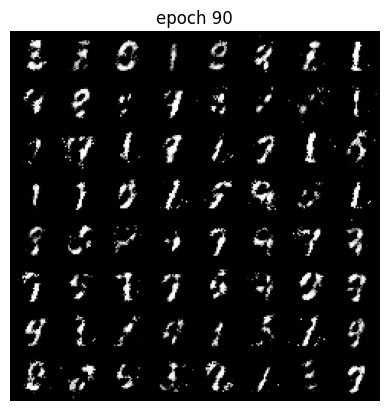

Epoch 90 of 100
Generator loss: 2.02961861, Discriminator loss: 0.76454824


118it [00:07, 15.44it/s]                         


Epoch 91 of 100
Generator loss: 1.96813295, Discriminator loss: 0.77817858


118it [00:07, 15.59it/s]                         


Epoch 92 of 100
Generator loss: 1.93765354, Discriminator loss: 0.78942468


118it [00:08, 14.61it/s]                         


Epoch 93 of 100
Generator loss: 1.87941825, Discriminator loss: 0.83417507


118it [00:07, 15.09it/s]                         


Epoch 94 of 100
Generator loss: 1.87607731, Discriminator loss: 0.83698360


118it [00:08, 13.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


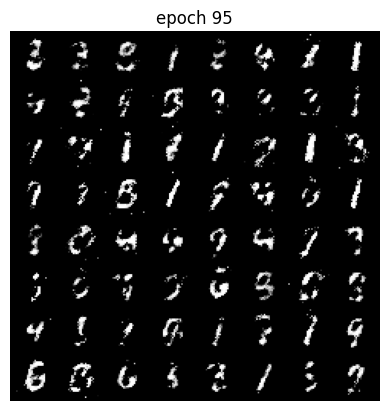

Epoch 95 of 100
Generator loss: 1.78745447, Discriminator loss: 0.87863283


118it [00:08, 13.97it/s]                         


Epoch 96 of 100
Generator loss: 1.76445932, Discriminator loss: 0.83022981


118it [00:07, 15.00it/s]                         


Epoch 97 of 100
Generator loss: 1.89675411, Discriminator loss: 0.82068886


118it [00:08, 14.29it/s]                         


Epoch 98 of 100
Generator loss: 1.80633356, Discriminator loss: 0.85118460


118it [00:08, 14.60it/s]                         


Epoch 99 of 100
Generator loss: 1.79191294, Discriminator loss: 0.87480487


118it [00:08, 14.56it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


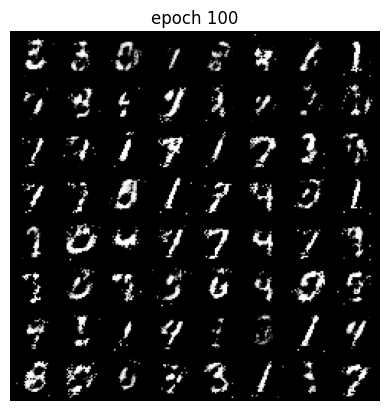

Epoch 100 of 100
Generator loss: 1.72641177, Discriminator loss: 0.89737946


In [22]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    loss = criterion(output, true_label)
    return loss
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    loss = criterion(output, true_label)
    return loss
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        x = data[0]

        ### UPDATE DISCRIMINATOR ###
        optim_d.zero_grad() # initialize gradient

        # real pass
        real_output = discriminator.forward(x)
        d_loss_real = discriminator_loss(real_output, label_real(real_output.size()[0]))

        # fake pass
        fake_data = generator.forward(create_noise(sample_size, nz))
        fake_output = discriminator.forward(fake_data)
        d_loss_fake = discriminator_loss(fake_output, label_fake(sample_size))

        loss_D = d_loss_real + d_loss_fake
        loss_D.backward()
        optim_d.step()

        loss_d += loss_D.detach().numpy()

        ### UPDATE GENERATOR ###
        optim_g.zero_grad() # initialize gradient

        generated_data = generator.forward(create_noise(sample_size, nz))
        generated_output = discriminator.forward(generated_data)
        loss_G = generator_loss(generated_output, label_real(sample_size)) # we want to trick the discriminator on this pass

        loss_G.backward()
        optim_g.step()

        loss_g += loss_G.detach().numpy()    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [23]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [24]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

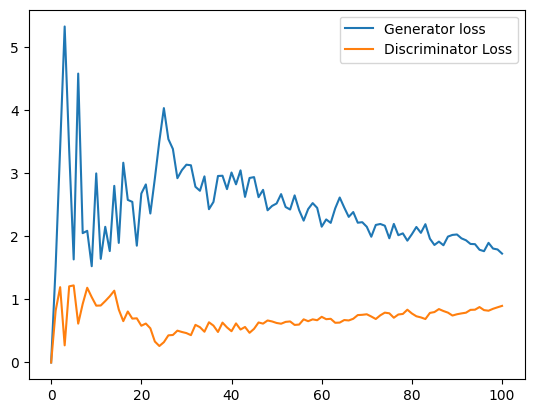

In [25]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')